# Markov Switching Autoregression Model

### Libs

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm
import warnings
warnings.simplefilter(action = 'ignore')

### Data Generation

In [44]:
data_range = pd.date_range(start = '1/1/2000', end = '31/12/2023', freq = 'QS') # Quarter Start Frequency
df = pd.DataFrame(data_range, columns = ['date'])
df['data'] = np.random.normal(loc = 5, scale = 100, size = (len(data_range))) # loc - mean, scale - std
df['data'] = (df['data'] - df['data'].min())/(df['data'].max() - df['data'].min())

In [45]:
df

,date,data
0,2000-01-01,0.206503
1,2000-04-01,0.296211
2,2000-07-01,0.905810
3,2000-10-01,0.501809
4,2001-01-01,0.704357
...,...,...
91,2022-10-01,0.000000
92,2023-01-01,0.176986
93,2023-04-01,0.323502
94,2023-07-01,0.312186


Text(0.5, 1.0, 'Arbitrary data')

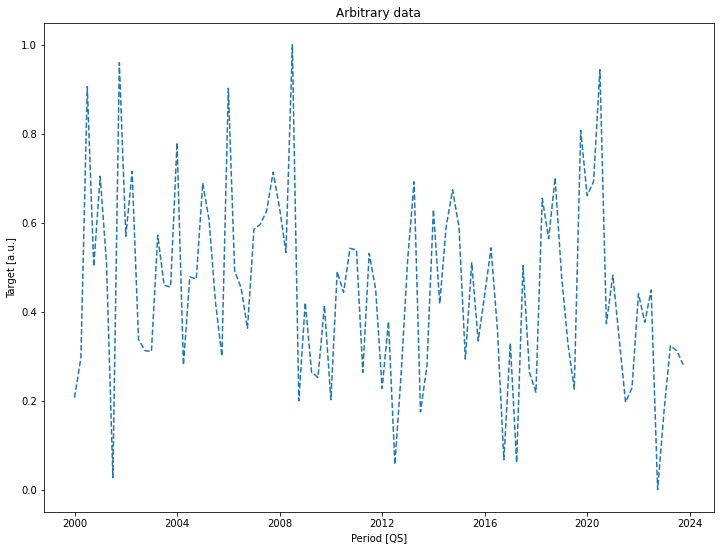

In [46]:
plt.figure(figsize = (12,9))
plt.plot(df['date'], df['data'], linestyle = '--', label = 'Arbitrary data')
plt.xlabel('Period [QS]')
plt.ylabel('Target [a.u.]')
plt.title('Arbitrary data')

### Fit and interpret the model

In [56]:
df.index = pd.DatetimeIndex(df['date'], freq = 'QS')
test_hamilton = sm.tsa.MarkovAutoregression(df['data'], k_regimes = 2, order = 4, switching_ar = False)
summary_hamilton = test_hamilton.fit()
summary_hamilton.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                     data   No. Observations:                   92
Model:             MarkovAutoregression   Log Likelihood                  19.301
Date:                  Tue, 02 Apr 2024   AIC                            -20.602
Time:                          10:17:53   BIC                              2.094
Sample:                      01-01-2000   HQIC                           -11.442
                           - 10-01-2023                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3237      0.038      8.530      0.000       0.249       0.398
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6258      0.047     13.362      0.000       0.534       0.718
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0178      0.005      3.812      0.000       0.009       0.027
ar.L1         -0.0674      0.159     -0.423      0.672      -0.380       0.245
ar.L2          0.3876      0.200      1.935      0.053      -0.005       0.780
ar.L3          0.2325      0.170      1.366      0.172      -0.101       0.566
ar.L4         -0.1864      0.143     -1.303      0.193      -0.467       0.094
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.7373      0.125      5.919      0.000       0.493       0.981
p[1->0]        0.3867      0.107      3.598      0.000       0.176       0.597
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

Text(0.5, 1.0, 'Marginal probabilities plot')

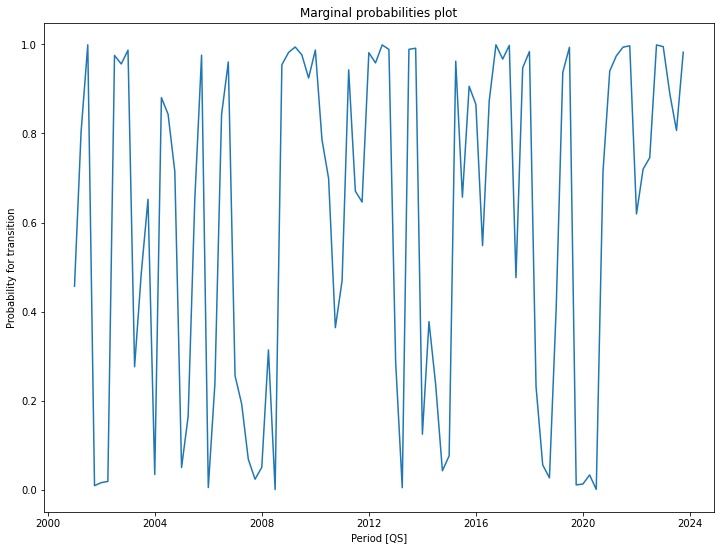

In [61]:
plt.figure(figsize = (12,9))
plt.plot(summary_hamilton.filtered_marginal_probabilities[0])
plt.xlabel('Period [QS]')
plt.ylabel('Probability for transition')
plt.title('Marginal probabilities plot')

In [62]:
print('Estimated duration in [QS] for both states [State 0, State 1]:', summary_hamilton.expected_durations)

Estimated duration in [QS] for both states [State 0, State 1]: [3.80647262 2.58628651]
